# Baldwin Enterprises 

is a large manufacturing company with operations and sales divisions located in the United States and several other countries. The CFO of the organization, Wes Hamrick, is concerned about the amount of money Baldwin has been paying in transaction costs in the foreign exchange markets and has asked you to help optimize Baldwin’s foreign exchange treasury functions.

With operations in several countries, Baldwin maintains cash assets in several different currencies: U.S. dollars (USD), the European Union’s euro (EUR), Great Britain's pound (GBP), Hong Kong dollars (HKD), and Japanese yen (JPY). To meet the different cash flow requirements associated with the company’s operations around the world, Baldwin must often move funds from one location (and currency) to another. For instance, to pay an unexpected maintenance expense at their facility in Japan, Baldwin may need to convert some of its holdings in U.S. dollars to Japanese yen.

The foreign exchange (FX) market is a network of financial institutions and brokers in which individuals, businesses, banks, and governments buy and sell the currencies of different countries. They do so in order to finance international trade, invest or do business abroad, or speculate on currency price changes.

 The FX market operates 24-hours a day and represents the largest and most liquid marketplace in the global economy. On average, the equivalent of about 1.5 trillion in different currencies is traded daily in the FX market around the world. The liquidity of the market provides businesses with access to international markets for goods and services by providing foreign currency necessary for transactions worldwide (see: http://www.ny.frb.org/fxc ). The

FX market operates in much the same way as a stock or commodity market where there is a bid price and ask price for each commodity (or, in this case, currency). A bid price is the price at which the market is willing to buy a particular currency and the ask price is the price at which the market is willing to sell a currency. The ask prices are typically slightly higher than the bid prices for the same currency – representing the transaction cost or the profit earned by the organizations that keep the market liquid.

The following table summarizes the current FX rates for the currencies Baldwin currently holds. The entries in this table represent the conversion rates from the row currencies to the column currencies.


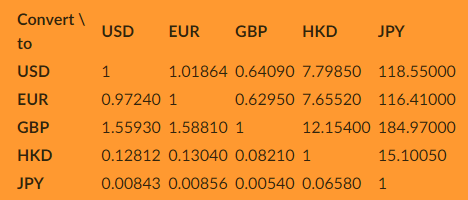

# 
For example, the table indicates that 1 British pound (GBP) can be exchanged (or sold) for 1.5593 U.S. dollars (USD). 

Thus, 1.5593 is the bid price, in U.S. dollars, for 1 British pound. Alternatively, the table indicates 1 U.S. dollar (USD) can be exchanged (sold) for 0.6409 British pounds (GBP). So, it takes about 1.5603 U.S. dollars (or 1/0.6409) to buy 1 British pound (or the ask price, in U.S. dollars, for 1 British pound is roughly 1.5603).

Notice that if you took 1 British pound, converted it to 1.5593 U.S. dollars, and then converted those 1.5593 dollars back to British pounds, you would end up with only 0.999355 British pounds (i.e., 1 3 1.5593 3 0.6409 5 0.999355). The money you lose in this exchange is the transaction cost.

Baldwin’s current portfolio of cash holdings includes 2 million USD, 5 million EUR, 1 million GBP, 3 million HKD, and 30 million JPY. This portfolio is equivalent to 9,058,560 USD under the current exchange rates (given earlier). 

Wes has asked you to design a currency trading plan that would increase Baldwin’s euro and yen holdings to 8 million EUR and 54 JPY, respectively, while maintaining the equivalent of at least 250,000 USD in each currency. Baldwin measures transaction costs as the change in the USD equivalent value of the portfolio.

Five Questions (30 points each)

1. Create a model for this problem and solve it.

2. What is the optimal trading plan?

3. What is the optimal transaction cost (in equivalent USD)?

4. Suppose another executive thinks that holding 250,000 USD in each currency is excessive and wants to lower the amount to 50,000 USD in each currency. Does this help to lower the transaction cost? Why or why not?

5. Suppose the exchange rate for converting USD to GBP increased from 0.6409 to 0.6414. What happens to the optimal solution in this case?

# 1. Create a model for this problem and solve it.

In [1]:
# import pulp
from pulp import LpVariable, LpProblem, LpMaximize, LpStatus, value, LpMinimize
import pandas as pd

# create hard-value constants here
start_usd = 2000000
start_eur = 5000000
start_gbp = 1000000
start_hkd = 3000000
start_jpy = 30000000


#all rates variables creation
uu_rate = 1
ue_rate = 0.97240
ug_rate = 1.55930
uh_rate = 0.12812
uj_rate = 0.00843
eu_rate = 1.01864
ee_rate = 1
eg_rate = 1.58810
eh_rate = 0.13040
ej_rate = 0.00856
gu_rate = 0.64090
ge_rate = 0.62950
gg_rate = 1
gh_rate = 0.08210
gj_rate = 0.00540
hu_rate = 7.79850
he_rate = 7.65520
hg_rate = 12.15400
hh_rate = 1
hj_rate = 0.06580
ju_rate = 118.55000
je_rate = 116.41000
jg_rate = 184.97000
jh_rate = 15.10050
jj_rate = 1

#computation of start totals in usd:
usd_rates = [uu_rate,ue_rate,ug_rate,uh_rate,uj_rate]
start_totals = [start_usd,start_eur,start_gbp,start_hkd,start_jpy]

start_currency_usd = [0]
start_total_usd = 0

for usd_rates, start_totals in zip(usd_rates,start_totals):
    start_currency_usd.append(usd_rates * start_totals)
    start_total_usd += usd_rates * start_totals
print(start_currency_usd)

print(start_total_usd)


# required ending balances:
min_usd = 250000
eur_goal = 8000000
jpy_goal = 54000000
min_gbp = min_usd*gu_rate
min_hkd = min_usd*hu_rate


[0, 2000000, 4862000.0, 1559300.0, 384360.00000000006, 252900.0]
9058560.0


In [2]:
# create exchange lp variables (buy / sell)
uu = LpVariable(name="uu", lowBound=0) # usd to usd
ue = LpVariable(name="ue", lowBound=0) # usd to eur (buy usd by selling foreign)
ug = LpVariable(name="ug", lowBound=0) # usd to gbp
uh = LpVariable(name="uh", lowBound=0) # usd to hkd
uj = LpVariable(name="uj", lowBound=0) # usd to jpy
eu = LpVariable(name="eu", lowBound=0) # eur to usd (sell usd by buying foreign)
ee = LpVariable(name="ee", lowBound=0) # eur to eur
eg = LpVariable(name="eg", lowBound=0) # eur to gbp
eh = LpVariable(name="eh", lowBound=0) # eur to hkd
ej = LpVariable(name="ej", lowBound=0) # eur to jpy
gu = LpVariable(name="gu", lowBound=0) # gbp to usd (sell usd by buying foreign)
ge = LpVariable(name="ge", lowBound=0) # gbp to eur
gg = LpVariable(name="gg", lowBound=0) # gbp to gbp
gh = LpVariable(name="gh", lowBound=0) # gbp to hkd
gj = LpVariable(name="gj", lowBound=0) # gbp to jpy
hu = LpVariable(name="hu", lowBound=0) # hkd to usd (sell usd by buying foreign)
he = LpVariable(name="he", lowBound=0) # hkd to eur
hg = LpVariable(name="hg", lowBound=0) # hkd to gbp
hh = LpVariable(name="hh", lowBound=0) # hkd to hkd
hj = LpVariable(name="hj", lowBound=0) # hkd to jpy
ju = LpVariable(name="ju", lowBound=0) # jpy to usd (sell usd by buying foreign)
je = LpVariable(name="je", lowBound=0) # jpy to eur
jg = LpVariable(name="jg", lowBound=0) # jpy to gbp
jh = LpVariable(name="jh", lowBound=0) # jpy to hkd
jj = LpVariable(name="jj", lowBound=0) # jpy to jpy

In [3]:
#ending balance calculations (start + buys - sells)

end_usd = start_usd + ue_rate*eu + ug_rate*gu + uh_rate*hu + uj_rate*ju - (ue + ug + uh + uj)
end_eur = start_eur + eu_rate*ue + eg_rate*ge + eh_rate*he + ej_rate*je - (eu + eg + eh + ej)
end_gbp = start_gbp + gu_rate*ug + ge_rate*eg + gh_rate*hg + gj_rate*jg - (gu + ge + gh + gj)
end_hkd = start_hkd + hu_rate*uh + he_rate*eh + hg_rate*gh + hj_rate*jh - (hu + he + hg + hj)
end_jpy = start_jpy + ju_rate*uj + je_rate*ej + jg_rate*gj + jh_rate*hj - (ju + je + jg + jh)

In [4]:
rates = [
    [1, 1.01864, 0.64090, 7.79850, 118.55000],
    [0.97240, 1, 0.62950, 7.65520, 116.41000],
    [1.55930, 1.58810, 1, 12.15400, 184.97000],
    [0.12812, 0.13040, 0.08210, 1, 15.10050],
    [0.00843, 0.00856, 0.00540, 0.06580, 1]
]
currencies = ['USD', 'EUR', 'GBP', 'HKD', 'JPY']
rates_df = pd.DataFrame(rates, columns=currencies, index=currencies)

In [23]:
def lp_prob():

    prob = LpProblem(name="Assignment_1_1",sense=LpMinimize)

    # minimize objective: Current account holding minus the exchange rate for each currency currently held (in USD)
    prob += start_total_usd - (end_usd 
             + ue_rate*(end_eur) 
             + ug_rate*(end_gbp) 
             + uh_rate*(end_hkd) 
             + uj_rate*(end_jpy))

    # exchange rate requirements by currency constraints
    prob += end_usd >= min_usd
    prob += end_eur == eur_goal
    prob += end_gbp >= min_gbp
    prob += end_hkd >= min_hkd
    prob += end_jpy == jpy_goal
    
    # starting currency constraints - do not exchange more than what you have
    prob += ue + ug + uh + uj <= start_usd
    prob += eu + eg + eh + ej <= start_eur
    prob += gu + ge + gh + gj <= start_gbp
    prob += hu + he + hg + hj <= start_hkd
    prob += ju + je + jg + jh <= start_jpy

    status = prob.solve()
    print(f"status={LpStatus[status]}")

#output optimal transactions:

    for variable in prob.variables():
        print(f'{variable.name} buy with {variable.varValue}')
    
    print("\nTotal account start (USD): $", round(start_total_usd, 2))
    print("Cost of exchange: $", round(value(prob.objective),2))
    new_holdings_diff = start_total_usd - value(prob.objective)
    print("Total account end: $", round(new_holdings_diff,2))
    
#output ending balances

    print("\nbuy usd: ",ue_rate*value(eu) + ug_rate*value(gu) + 
          uh_rate*value(hu) + uj_rate*value(ju))
    
    print("sell usd: ",value(ue) + value(ug) + value(uh) + value(uj))
    
    print("ending usd: " ,start_usd + ue_rate*value(eu) +
          ug_rate*value(gu) + uh_rate*value(hu) + uj_rate*value(ju) 
          - (value(ue) + value(ug) + value(uh) + value(uj)))
    
    print("\nbuy eur: ",eu_rate*value(ue) +
          eg_rate*value(ge) + eh_rate*value(he) + ej_rate*value(je))
    
    print("sell eur: ",value(eu) + value(eg) + value(eh) + value(ej))
    
    print("ending eur: " ,start_eur + eu_rate*value(ue) +
          eg_rate*value(ge) + eh_rate*value(he) + ej_rate*value(je) 
          - (value(eu) + value(eg) + value(eh) + value(ej)))
    
    print("\nbuy gbp: ",ge_rate*value(eg) +
          gu_rate*value(ug) + gh_rate*value(hg) + gj_rate*value(jg))

    print("sell ghp: ",value(ge) + value(gu) + value(gj) + value(gh))
    
    print("ending gbp: " ,start_gbp + ge_rate*value(eg) +
          gu_rate*value(ug) + gh_rate*value(hg) + gj_rate*value(jg) 
          - (value(ge) + value(gu) + value(gj) + value(gh)))
    
    print("ending gbp in usd: " ,(start_gbp + ge_rate*value(eg) +
          gu_rate*value(ug) + gh_rate*value(hg) + gj_rate*value(jg) 
          - (value(ge) + value(gu) + value(gj) + value(gh)))*ug_rate)
    
    print("\nending hkd: " ,start_hkd + he_rate*value(eh) +
          hg_rate*value(gh) + hj_rate*value(jh) + hu_rate*value(uh) 
          - (value(he) + value(hu) + value(hj) + value(hg)))
    
    print("ending hkd in usd: " ,(start_hkd + he_rate*value(eh) +
          hg_rate*value(gh) + hj_rate*value(jh) + hu_rate*value(uh) 
          - (value(he) + value(hu) + value(hj) + value(hg)))*uh_rate)

    print("ending jpy: " ,start_jpy + je_rate*value(ej) +
          jg_rate*value(gj) + jh_rate*value(hj) + ju_rate*value(uj) 
          - (value(je) + value(ju) + value(jh) + value(jg)))


In [24]:
lp_prob()
rates_df

status=Optimal
eg buy with 0.0
eh buy with 0.0
ej buy with 0.0
eu buy with 0.0
ge buy with 606208.68
gh buy with 0.0
gj buy with 291939.23
gu buy with 32065.67
he buy with 0.0
hg buy with 0.0
hj buy with 0.0
hu buy with 0.0
je buy with 0.0
jg buy with 0.0
jh buy with 30000000.0
ju buy with 0.0
ue buy with 2000000.0
ug buy with 0.0
uh buy with 0.0
uj buy with 0.0

Total account start (USD): $ 9058560.0
Cost of exchange: $ 28053.16
Total account end: $ 9030506.84

buy usd:  49999.999230999994
sell usd:  2000000.0
ending usd:  49999.999230999965

buy eur:  3000000.004708
sell eur:  0.0
ending eur:  8000000.004708

buy gbp:  0.0
sell ghp:  930213.5800000001
ending gbp:  69786.41999999993
ending gbp in usd:  108817.96470599988

ending hkd:  4974000.0
ending hkd in usd:  637268.88
ending jpy:  53999999.3731


,USD,EUR,GBP,HKD,JPY
USD,1.00000,1.01864,0.6409,7.7985,118.5500
EUR,0.97240,1.00000,0.6295,7.6552,116.4100
GBP,1.55930,1.58810,1.0000,12.1540,184.9700
HKD,0.12812,0.13040,0.0821,1.0000,15.1005
JPY,0.00843,0.00856,0.0054,0.0658,1.0000


# 4. Suppose another executive thinks that holding

In [7]:
min_usd = 50000
min_gbp = min_usd*gu_rate # recalculate after new min
min_hkd = min_usd*hu_rate # recalculate after new min

In [8]:
lp_prob()

status=Optimal
eg buy with 0.0
eh buy with 0.0
ej buy with 0.0
eu buy with 0.0
ge buy with 606208.68
gh buy with 0.0
gj buy with 291939.23
gu buy with 32065.67
he buy with 0.0
hg buy with 0.0
hj buy with 0.0
hu buy with 0.0
je buy with 0.0
jg buy with 0.0
jh buy with 30000000.0
ju buy with 0.0
ue buy with 2000000.0
ug buy with 0.0
uh buy with 0.0
uj buy with 0.0

Total account start (USD): $ 9058560.0
Cost of exchange: $ 28053.16
Total account end: $ 9030506.84

ending usd:  49999.999230999965
buy usd=:  49999.999230999994
ending eur:  8000000.004708
ending gbp:  69786.41999999993
ending gbp in usd:  108817.96470599988
ending hkd:  4974000.0
ending hkd in usd:  637268.88
ending jpy:  53999999.3731


# 5. Suppose the exchange rate for converting USD to GBP increased from 0.6409 to 0.6414. What happens to the optimal solution in this case?

In [9]:
gu_rate = 0.6414
min_usd = 50000
min_gbp = min_usd*gu_rate # recalculate after new min
min_hkd = min_usd*hu_rate # recalculate after new min

In [10]:
lp_prob()

status=Optimal
eg buy with 0.0
eh buy with 0.0
ej buy with 0.0
eu buy with 0.0
ge buy with 606208.68
gh buy with 0.0
gj buy with 291939.23
gu buy with 32065.67
he buy with 0.0
hg buy with 0.0
hj buy with 0.0
hu buy with 0.0
je buy with 0.0
jg buy with 0.0
jh buy with 30000000.0
ju buy with 0.0
ue buy with 2000000.0
ug buy with 0.0
uh buy with 0.0
uj buy with 0.0

Total account start (USD): $ 9058560.0
Cost of exchange: $ 28053.16
Total account end: $ 9030506.84

ending usd:  49999.999230999965
buy usd=:  49999.999230999994
ending eur:  8000000.004708
ending gbp:  69786.41999999993
ending gbp in usd:  108817.96470599988
ending hkd:  4974000.0
ending hkd in usd:  637268.88
ending jpy:  53999999.3731
